In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')  # a popular data visualization theme

# Salary Ranges Dataset:

In [4]:
salary_ranges = pd.read_csv('data/Salary_Ranges_by_Job_Classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [5]:
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [6]:
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [7]:
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07170     9
07420     9
06870     9
Name: Grade, dtype: int64

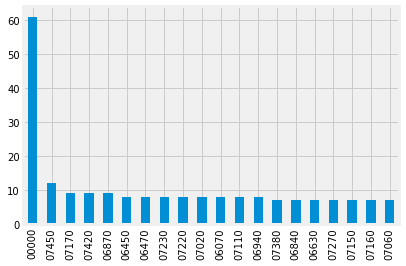

In [8]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

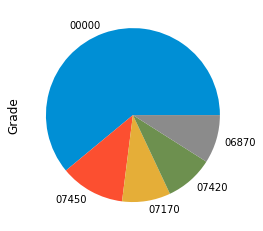

In [9]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

In [10]:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [11]:
sub_salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]
sub_salary_ranges.head(10)

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000
5,$100.00,00000
6,$200.00,00000
7,$500.00,00000
8,$0.00,00000
9,$10630.00,0140F


In [16]:
sub_salary_ranges['Biweekly High Rate'] = sub_salary_ranges['Biweekly High Rate'].\
    map(lambda value: value.replace('$', '')).astype(float)

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
sub_salary_ranges.head(5)

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [18]:
sub_salary_ranges['Grade'] = sub_salary_ranges['Grade'].astype(str)
sub_salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
sub_salary_ranges.describe()

,Biweekly High Rate
count,1356.000000
mean,3161.727021
std,1481.002904
min,0.000000
25%,2145.000000
50%,2856.500000
75%,3703.000000
max,12120.770000


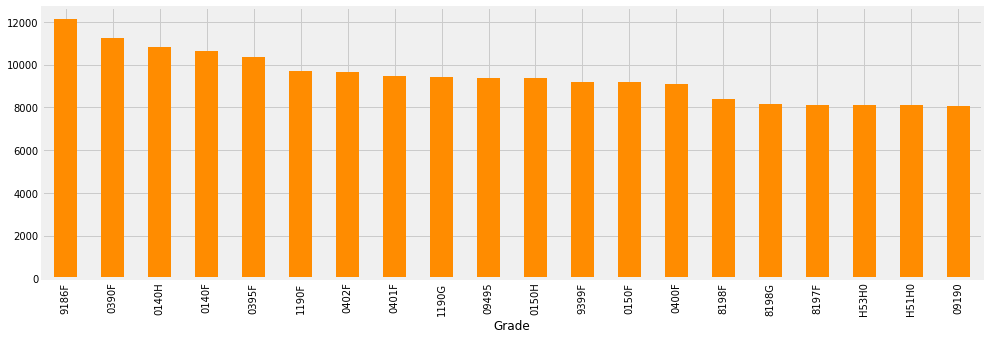

In [38]:
plt.figure(figsize=(15,5))
sub_salary_ranges.groupby('Grade')['Biweekly High Rate'].mean().sort_values(ascending=False).head(20).\
plot(kind='bar', stacked=False, color='darkorange')

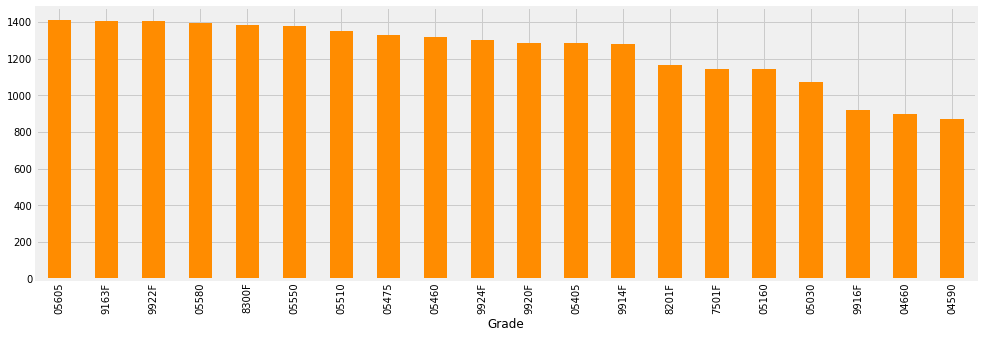

In [39]:
plt.figure(figsize=(15,5))
sub_salary_ranges.groupby('Grade')['Biweekly High Rate'].mean().sort_values(ascending=False).tail(20).\
plot(kind='bar', stacked=False, color='darkorange')

In [91]:
#定比等级
sorted_df = sub_salary_ranges.groupby('Grade')['Biweekly High Rate'].mean().sort_values(ascending=False)
sorted_df.iloc[0] / sorted_df.iloc[-1]

13.931919540229886

# SFO Customer Survey Dataset:

In [41]:
customer = pd.read_csv('data/2013_SFO_Customer_survey.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [42]:
#我们关注Q7A_ART 这一列。如数据字典所述，Q7A_ART 是关于艺术品和展览的。可
#能的选择是0、1、2、3、4、5、6，每个数字都有含义

In [46]:
art_ratings = customer['Q7A_ART']
art_ratings.value_counts()

4    1066
5     803
6     779
3     696
0     100
2      71
1      20
Name: Q7A_ART, dtype: int64

In [53]:
art_ratings = art_ratings[(art_ratings <=5) & (art_ratings >=1)]\
.astype(str)

In [54]:
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

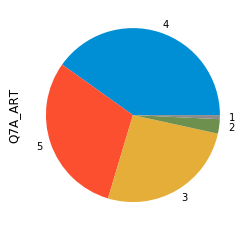

In [55]:
art_ratings.value_counts().plot(kind='pie')

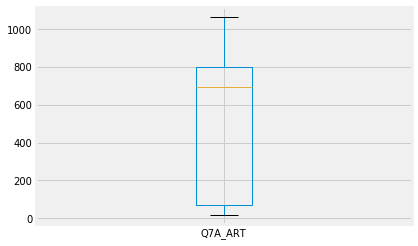

In [56]:
art_ratings.value_counts().plot(kind='box')

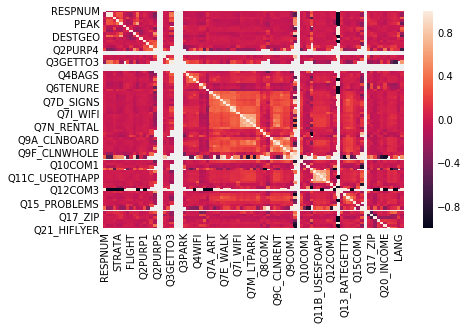

In [57]:
sns.heatmap(customer.corr())

In [58]:
# here we will remove the columns that contain those missing values for now
customer.dropna(axis=1, inplace=True)

In [60]:
customer.dropna(axis=1, inplace=True)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 66 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q3GETTO1           3535 non-null int64
Q4BAGS             3535 non-null int64
Q4BUY              3535 non-null int64
Q4FOOD             3535 non-null int64
Q4WIFI             3535 non-null int64
Q5FLYPERYR         3535 non-null int64
Q6TENURE           3535 non-null

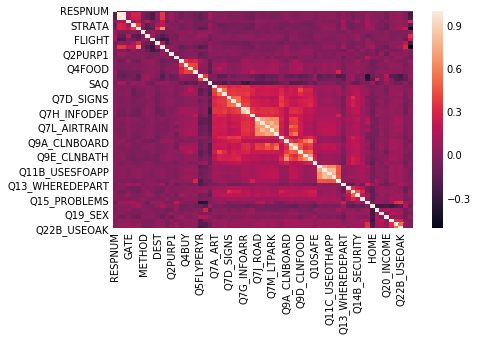

In [61]:
sns.heatmap(customer.corr())

# Chicago Food Inspections Data

In [62]:
food = pd.read_csv('data/Food_Inspections.csv')
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154657 entries, 0 to 154656
Data columns (total 17 columns):
Inspection ID      154657 non-null int64
DBA Name           154657 non-null object
AKA Name           152113 non-null object
License #          154642 non-null float64
Facility Type      150086 non-null object
Risk               154589 non-null object
Address            154657 non-null object
City               154497 non-null object
State              154648 non-null object
Zip                154559 non-null float64
Inspection Date    154657 non-null object
Inspection Type    154656 non-null object
Results            154657 non-null object
Violations         123679 non-null object
Latitude           154110 non-null float64
Longitude          154110 non-null float64
Location           154110 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 20.1+ MB


In [63]:
food.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2544
License #             15
Facility Type       4571
Risk                  68
Address                0
City                 160
State                  9
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30978
Latitude             547
Longitude            547
Location             547
dtype: int64

In [64]:
food.groupby('Risk')[['Zip']].count()

,Zip
Risk,
All,20
Risk 1 (High),107916
Risk 2 (Medium),31991
Risk 3 (Low),14564


In [65]:
food.groupby('Risk')['Zip'].count()

Risk
All                    20
Risk 1 (High)      107916
Risk 2 (Medium)     31991
Risk 3 (Low)        14564
Name: Zip, dtype: int64

Text(0.5, 1.0, 'Risk by Inspection Type')

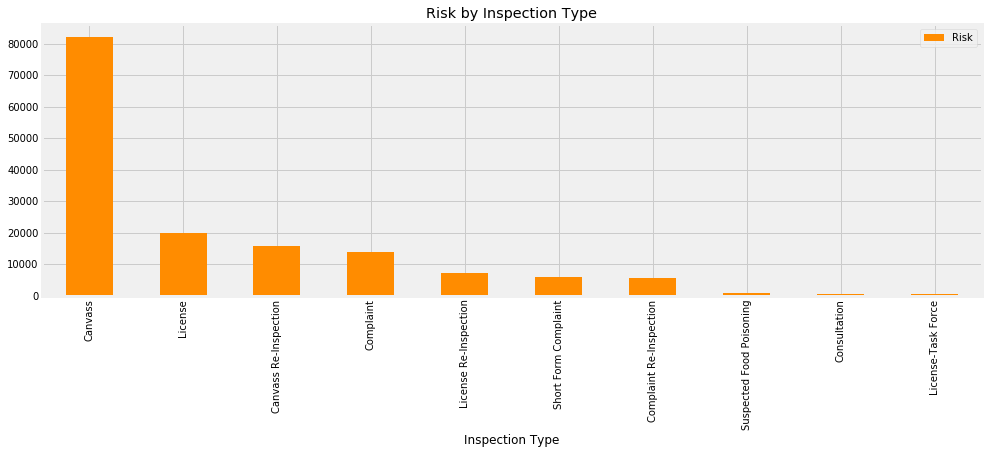

In [66]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].count().sort_values(
    'Risk', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Risk by Inspection Type')

In [67]:
food['Risk'].unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', nan, 'All'],
      dtype=object)

In [71]:
food['Risk'] = food['Risk'].astype(str)

In [72]:
food['Risk'] = food['Risk'].map(lambda value: value.replace('Risk', '').\
replace('(High)', '').replace('(Low)', '').replace('(Medium)', '').\
replace('All', '0').replace('nan', '0')).astype(int)

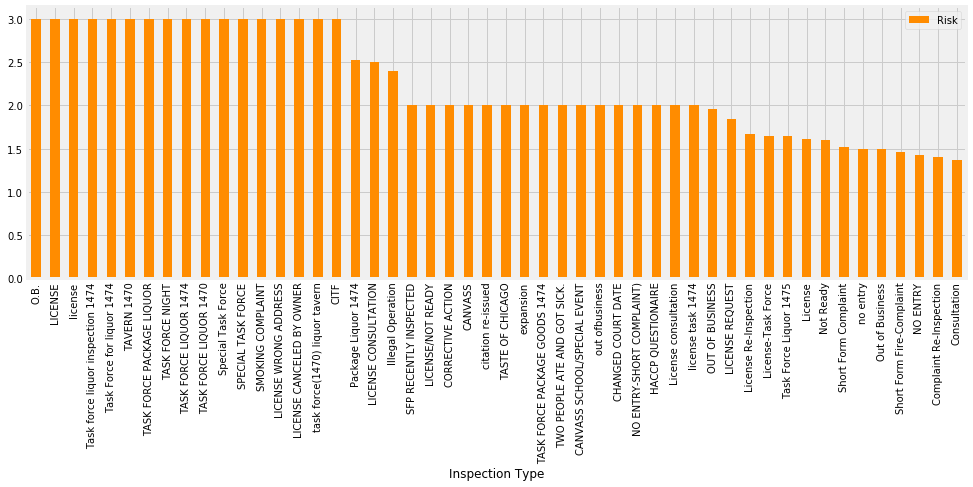

In [85]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
food.groupby('Inspection Type')[['Risk']].\
mean().sort_values('Risk', ascending=False).\
head(50).plot(kind='bar', ax=ax, color='darkorange')

# Climate Change Dataset:

In [98]:
climate = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

In [99]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [100]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [101]:
climate.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [102]:
climate.dropna(inplace=True)

In [103]:
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [104]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 502.6+ MB


In [105]:
# remove the "N" and "S" from Latitude
climate['Latitude'] = climate['Latitude'].map(lambda value: value.replace('N', '').replace('S', ''))

In [106]:
# remove the "W" and "E" from Longitude
climate['Longitude'] = climate['Longitude'].map(lambda value: value.replace('E', '').replace('W', ''))

In [107]:
climate['Longitude'] = climate['Longitude'].astype(float)
climate['Latitude'] = climate['Latitude'].astype(float)

Text(0.5, 1.0, 'Max Avg Temp by Country')

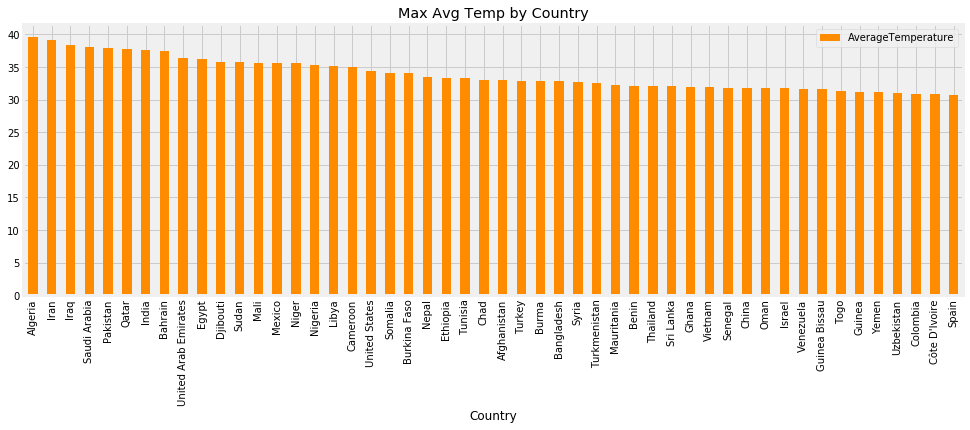

In [108]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate.groupby('Country')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by Country')

In [112]:
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)
climate['year']

0          1743
5          1744
6          1744
7          1744
8          1744
           ... 
8599206    2013
8599207    2013
8599208    2013
8599209    2013
8599210    2013
Name: year, Length: 8235082, dtype: int64

In [113]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05,10.33,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05,10.33,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05,10.33,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05,10.33,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05,10.33,1744


In [114]:
climate['century'] = climate['year'].map(lambda x: int(x / 100) + 1)
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,century
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05,10.33,1743,18
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05,10.33,1744,18
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05,10.33,1744,18
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05,10.33,1744,18
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05,10.33,1744,18


In [115]:
climate['AverageTemperature'].describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

In [117]:
climate_sub_us = climate[climate['Country'] == 'United States']

In [118]:
climate_sub_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661524 entries, 47555 to 8439246
Data columns (total 9 columns):
dt                               661524 non-null datetime64[ns]
AverageTemperature               661524 non-null float64
AverageTemperatureUncertainty    661524 non-null float64
City                             661524 non-null object
Country                          661524 non-null object
Latitude                         661524 non-null float64
Longitude                        661524 non-null float64
year                             661524 non-null int64
century                          661524 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 50.5+ MB


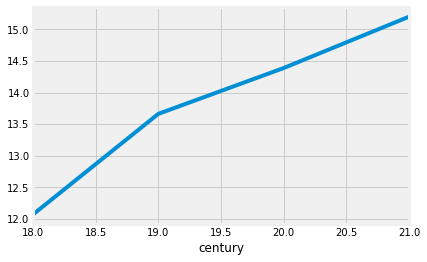

In [121]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [123]:
climte_change = climate_sub_us.groupby('century')['AverageTemperature'].mean()
climte_change

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64

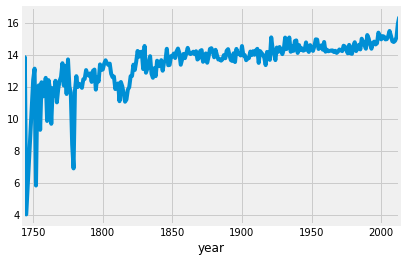

In [124]:
climate_sub_us.groupby('year')['AverageTemperature'].mean().plot()

In [127]:
climate_sub_us.groupby(['City', 'century'])[['AverageTemperature']].max().head()

AverageTemperature
City    century                    
Abilene 19                   29.690
        20                   31.125
        21                   32.110
Akron   18                   28.597
        19                   24.810

Text(0.5, 1.0, 'Max Avg Temp by US City')

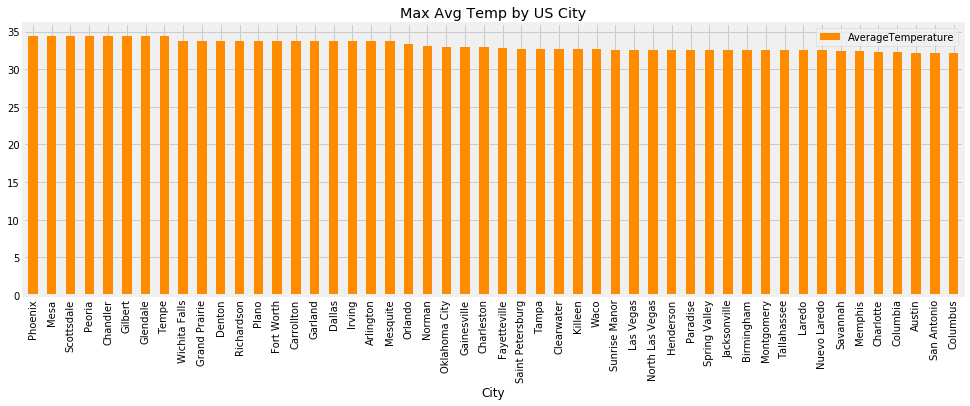

In [129]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate_sub_us.groupby('City')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by US City')